# Quantifying Water Stress Indicators to Aid In Water Demand Forecasting
#### Sarah Naameh, Mohamed Rakha, Amir Shahatit

## Abstract
Climate change is interrupting global biogeochemical cycles and spelling disaster for countries with booming populations. Water is quickly becoming a point of contention internationally as supplies grow scarcer. The countries with the least flexibility and water resources are being impacted the hardest despite having contributed the least to accelerating climate change. The MENA, Middle Eastern and North African, region is a shining example. MENA region is experiencing a high level of renewable freshwater stress that is nearly twice the world average and by far the highest of any region in the world.  Almost all of the MENA countries rank in the top 40 most water-stressed countries in the world, and the top ten is entirely MENA countries. We are hoping to find the indicators most correlated with water stress and demand to aid in further statistical analysis and research.

After a stringent filtering process based primarily on data availability, we split the data into regions divided on a geographical and sociopolitical level. Then, we created a look up table of data frames indexed by the country and feature. Each data frame contains the relevant data necessary to predict that country’s feature in the year 2020. With this in place, we picked the optimal model among LinearRegression, DecisionTreeRegression and Ridge for each country year pair and store it in a separate look-up table. We finally pieced all of this together to plot the predictions for each country in a given region from 1980-2015 as well as our projection for 2020. We isolated a handful of variables that our model performed well on and have some use in determining trends in water stress, namely: rural population, GDP per capita, surface water produced internally, environmental flow requirements, and total renewable water resources.
These are the factors we find to be most relevant for water demand and scarcity.



## Background
Humanity has borne witness to a string of water crises in recent years. So much so that we know have a name for them: “Day Zero” – the day when the taps run dry. It has already hit major cities like Cape Town, São Paolo, and Chennai. These are just a few examples of how water stress can impact people, livelihoods and businesses around the globe.
"Water stress is the biggest crisis no one is talking about. Its consequences are in plain sight in the form of food insecurity, conflict and migration, and financial instability.” Dr. Andrew Steer, President and CEO of the World Resources Institute.

Population growth and urbanization along with improving living conditions - including the demand for meat, water intensive crops, and greater convenience -- are causing a surge in water demand across the world. This is most apparent in the Global South.

Water stress occurs when a population’s water demand exceeds the available resources. To combat this scarcity, governments will over-exploit and degrade their renewable resources, feeding a vicious positive feedback loop. Being able to predict water demand and individually tackle each of the factors contributing to water stress on a policy level will be a key tool in mitigating climate change effects and providing clean water to populations.

The MENA, or Middle East and North African, region is the most water-stressed section of the world. MENA has the least actual renewable water resources per capita in the world, which is not surprising given its hot, arid climate. They are simultaneously extracting the highest percentage of their renewable water resources, roughly 80%. The MENA region has the highest expected economic losses from climate-related water scarcity, currently estimated at 6-14% of GDP by 2050. As the population of the area continues to grow and quality of life increases, people are demanding more and more clean water. Already, the ten most water-stressed countries in the world sit in the MENA region, and two more round out the top fifteen. In Lebanon (#2 on the list), people have taken to the streets to protest, among other things, soaring water prices and less consistent access. It is clear that water scarcity is a crisis for people, governments, and the world.

It is imperative that researchers and statisticians quantify all factors feeding in to water demand, stress, and scarcity to predict future needs and plan accordingly. Water resource availability will continue to change as a consequence of climate change, population increases, lifestyle changes, and other environmental factors. The ability to forecast future water demand will allow policy makers to plan for water resource allocation in the long-term as well as tackle the contributing factors. These factors which are highly correlated with water demand or stress, will provide windows of insight as to what initiatives the government should take on to be able to reduce scarcity.



## Project Objective
We are attempting to further statistical analyses of water resource issues in the MENA region. Our hope is that finding the variables with the greatest weight on water stress will allow for more efficient and accurate predictions. The statistics we produce should be particularly useful in 2020 predictions. This project aims to find the best indicators for future water resource allocation considerations. Since “AQUASTAT” is universally available, it will serve policymakers and researchers well to see which indicators are the best predictors of water demand and future shortages. The purpose of this project is to train and evaluate various models on water stress indicators using historical data as well as features from the Food and Agriculture Organization’s “AQUASTAT” database and Geopandas’ world database.

*Our objective is to monitor the trends of water demand regionally based on a majority of features including GDP, population growth, surface water demand, and other sociopolitical variables.*



## Data Description
For our primary data source, we evaded rate-limiting, and a pretty crummy API to download AQUASTAT dataset (as a CSV file). AQUASTAT is the Food and Agriculture Organization’s database on water resources and agricultural water management. It contains over 180 variables for a wide variety of countries.  AQUASTAT emphasizes on Africa, the Near East, countries of the former Soviet Union, Asia, Latin America and the Caribbean. AQUASTAT plays a key role in the monitoring of the Sustainable Development Goal 6 that sets out to "ensure availability and sustainable management of water and sanitation for all", and in particular water stress and water use efficiency.

As downloaded, the data was very fine-grained, with every row representing a country, a variable and the corresponding singular value to the variable on a given year. We pivoted the dataset on Country and Year to give it a more traditional tabular data look (a row containing all values on a given year for a given country). This, however, made the table appear relatively sparse, and we therefore had to aggressively isolate regions that consistently had a substantial portion of its data available. We will have to do some sort aggregation to deal with the sparsity.

 In terms of faithfulness, we believe the AQUASTAT dataset is reputable as the Food and Agriculture Organization is an organization under the United Nations’ jurisdiction. That being said, there isn't much information on how they themselves retrieved the data. It is also worth noting that the majority of the countries chosen have gone through sociopolitical upheaval(s) in the last 50 years and may have had slightly incorrect or unreliable reporting as a result.

We joined this data with GeoPandas data to help us visualize the countries that had sufficiently dense data in order to make more intelligent clusters. After isolating countries in seven clusters with a substantial amount of data, we were ready to train models to predict for desired outcomes for countries within each region/cluster.

**Summary:** <br>
Structure: CSV files<br>
Granularity: As downloaded, very fine<br>
Temporality: There were rows for each year, though data was not filled in each year<br>
Faithfulness: Faithful as our primary data source is from the United Nations<br>
Scope: There are 193 countries with 180 variables available in the primary dataset. After aggressive filtering and clustering, we settled on 76 countries with 40 variables
 <br>
 <br>
*Other potential datasets explored early on:*<br>
>World Bank - Water Resources Data http://siteresources.worldbank.org/INTMENA/Resources/App-all-Scarcity.pdf <br>
*Dropped because we would not be able to merge it onto the AQUASTAT dataframe on a country and year basis.*<br>

>MENA Wastewater Data https://www.statista.com/statistics/714462/middle-east-wastewater-collection-by-select-country/<br>
*Dropped because the dataset was limited to data collected in 2013 only.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Ridge

In [2]:
df1 = pd.read_csv('aquastat_flat.csv',lineterminator='\r')
df2 = pd.read_csv('as2.csv',lineterminator='\r')[:-1]
df3 = pd.read_csv('as3.csv',lineterminator='\r')[:-1]
df4 = pd.read_csv('as4.csv',lineterminator='\r')[:-1]
df5 = pd.read_csv('as5.csv',lineterminator='\r')[:-1]
df6 = pd.read_csv('as6.csv',lineterminator='\r')[:-1]
df7 = pd.read_csv('as7.csv',lineterminator='\r')[:-1]
df8 = pd.read_csv('as8.csv',lineterminator='\r')[:-1]
df9 = pd.read_csv('as9.csv',lineterminator='\r')[:-1]
df10 = pd.read_csv('as10.csv',lineterminator='\r')[:-1]
df11 = pd.read_csv('as11.csv',lineterminator='\r')[:-1]
df12 = pd.read_csv('as12.csv',lineterminator='\r')[:-1]
df13 = pd.read_csv('as13.csv',lineterminator='\r')[:-1]
df14 = pd.read_csv('as14.csv',lineterminator='\r')[:-1]

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14])

In [4]:
df.Area.replace(regex=True,inplace=True,to_replace=r'\n',value=r'')
df.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value
0,Afghanistan,2.0,% of total country area cultivated,4470.0,1982.0,12.34
1,Afghanistan,2.0,Total population,4104.0,1982.0,12750.00
2,Afghanistan,2.0,Rural population,4105.0,1982.0,10705.00
3,Afghanistan,2.0,Urban population,4106.0,1982.0,2045.00
4,Afghanistan,2.0,GDP per capita,4458.0,1981.0,272.80


In [5]:
clean_df =  pd.pivot_table(df,index = ['Area','Year'],columns = 'Variable Name', values = 'Value')
clean_df = clean_df.reset_index()
print("# of countries: {}".format(len(clean_df.Area.unique())))
clean_df.head()

# of countries: 201


Variable Name,Area,Year,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,% of area equipped for irrigation by mixed surface water and groundwater,% of area equipped for irrigation by surface water,% of area equipped for irrigation drained,...,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable
0,Afghanistan,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.68,65.33,5124.0,NaN,NaN,NaN,NaN,2045.0,NaN,18.18
3,Afghanistan,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
To begin, we have to eliminate as many Nan values as possible. This means removing variables within our dataset that contain less than the threshhold amount of non-null values. First, we aggregate the data into 5 year periods (one data value per five year interval per variable) as very few countries actually had the data at a year to year granularity. We then remove variables through aggressive, iterative filtering to find the country, variable pairs with sufficient density (relatively few Nans, that we could justify interpolating). In the few cases where there was a NaN value still present, we linearly interpolated the expected results to successfully run our models. 

In [6]:
# Clumping into 5 year intervals using the average of 2 years before and 3 years after
# All Years
all_years = set(clean_df["Year"])
print("Range of all years {} : {}".format(min(all_years), max(all_years)))
dfs = []
for i in range(1980, 2016, 5):
    filtered = clean_df[(clean_df["Year"] > i -2) & (clean_df["Year"] < i + 3)]
    f_group = filtered.groupby("Area").mean()
    f_group["Year"] = i
    dfs.append(f_group)
df_every_5 = pd.concat(dfs)   
print("Aggregated into the following bins: " + str(df_every_5["Year"].unique()))

Range of all years 1978.0 : 2017.0
Aggregated into the following bins: [1980 1985 1990 1995 2000 2005 2010 2015]


In [7]:
g50r = df_every_5[df_every_5.count(axis = 1) >= 50]
len(g50r.index.unique())
grouped = g50r.groupby("Area").count().sort_values(by ='Year',ascending = False).reset_index()
good_candidates = grouped[grouped["Year"] > 5]["Area"]
df_good_candidates = g50r.set_index("Year")
df_good_candidates
g50r[g50r.index == "Jordan"].count()
special = ["GDP per capita"]
dense_variables = {v:np.mean(grouped[v]) for v in grouped.columns[1:] if np.mean(grouped[v]) > 5.5 or v in special}

print("{} variables passed the density tests above".format(len(dense_variables)))

40 variables passed the density tests above


In [9]:
# Dropping obviously collinear columns
to_drop = [i for i in dense_variables if "treat" in i] + ["Gross Domestic Product (GDP)", "Long-term average annual precipitation in depth", "Overlap: between surface water and groundwater", "Total internal renewable water resources per capita"]

In [10]:
# Dropping countries with high numbers of Nans
dense_df = df_every_5[list(dense_variables.keys())].reset_index()
grouped = dense_df.groupby("Area").count().sort_values(by ='Year',ascending = False)
totals = grouped.sum(axis=1)
np.mean(totals)
best_countries = totals[totals > 275].index
print("{} countries with sufficient data".format(len(best_countries)))
final_data = dense_df[dense_df["Area"].isin(best_countries)].drop(columns=to_drop)

# final_data = final_data.interpolate()
print("Total nans = {}".format(sum(final_data.isna().sum())))
final_data.to_csv("final_cleaned_data.csv")
final_data.head()
final_data[final_data.isna().any(axis=1)]
# for i in final_data.columns:
#     print(i, sum(final_data[i].isna()))
final_data.head()

145 countries with sufficient data
Total nans = 195


Variable Name,Area,Year,% of total country area cultivated,Arable land area,Cultivated area (arable land + permanent crops),Dependency ratio,GDP per capita,Groundwater produced internally,Groundwater: accounted inflow,Groundwater: entering the country (total),...,Surface water: total flow of border rivers,Total area of the country (excl. coastal waters),Total internal renewable water resources (IRWR),Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
0,Afghanistan,1980,12.340,7910.0,8054.0,28.7200,272.8,10.650,0.00,0.00,...,33.4,65286.0,47.15,12750.0,10.650,55.68,65.33,5124.0,2045.0,18.18
1,Albania,1980,24.660,589.0,709.0,10.9300,NaN,6.200,0.00,0.00,...,0.0,2875.0,26.90,2788.0,6.200,26.35,30.20,10832.0,982.0,3.30
2,Algeria,1980,3.153,6881.0,7509.0,3.5990,2197.0,1.487,0.03,0.03,...,0.0,238174.0,11.25,20576.0,1.517,10.15,11.67,567.2,9408.0,0.42
4,Angola,1980,2.727,2900.0,3400.0,0.2695,NaN,58.000,0.00,0.00,...,0.0,124670.0,148.00,9582.0,58.000,145.40,148.40,15487.0,1707.0,0.40
6,Argentina,1980,10.070,27000.0,27992.0,66.6700,2908.0,128.000,0.00,0.00,...,135.9,278040.0,292.00,28994.0,128.000,860.20,876.20,30220.0,24281.0,584.20


In [11]:
# Interpolate approach 1
""""
def closest_years(y):
    if y == 2015:
        return [2005, 2010]
    elif y == 1980:
        return [1985, 1990]
    else:
        return [y-5, y+5]

def interpolate(df, i):
    row = df.iloc[i]
    for var in df.columns[pd.isna(row)]:
        df.at[i, ] = np.mean(df[df["Area"] == row["Area"]][var])

print("Before: Total nans = {}".format(sum(final_data.isna().sum())))
for i in range(len(final_data)):
    interpolate(final_data, i)
print("After: Total nans = {}".format(sum(final_data.isna().sum())))
"""
# Interpolate approach 2
print("Before interpolation: Total nans = {}".format(sum(final_data.isna().sum())))
split_data = []
for country in final_data["Area"].unique():
    filtered = final_data[final_data["Area"] == country]
    interpolated = filtered.drop(columns="Area").interpolate(axis=1)
    interpolated["Area"] = country
    split_data += [interpolated]
final_data = pd.concat(split_data)
print("After: Total nans = {}".format(sum(final_data.isna().sum())))
final_data.describe()

Before interpolation: Total nans = 195
After: Total nans = 0


Variable Name,Year,% of total country area cultivated,Arable land area,Cultivated area (arable land + permanent crops),Dependency ratio,GDP per capita,Groundwater produced internally,Groundwater: accounted inflow,Groundwater: entering the country (total),Long-term average annual precipitation in volume,...,Surface water: total flow of border rivers,Total area of the country (excl. coastal waters),Total internal renewable water resources (IRWR),Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1.160000e+03,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,1997.500000,27.427817,7865.624649,8733.940780,22.957364,8128.846779,66.728779,0.016628,0.093731,664.871231,...,349.457591,73584.794793,258.454390,3.965244e+04,66.745393,328.607569,335.214300,28345.348654,18694.115328,76.760324
std,11.461381,123.990941,22779.913974,24032.371625,29.141082,14326.807683,166.327636,0.180887,0.926046,1652.339245,...,2944.441282,169818.302110,678.185947,1.417045e+05,166.318005,884.412574,891.285739,70012.726567,58340.333235,283.128648
min,1980.000000,0.043100,1.000000,1.000000,0.000000,0.007500,0.000000,-1.200000,0.000000,0.057300,...,0.000000,2.600000,0.000000,4.135000e+01,0.015000,0.000000,0.020000,1.418000,14.180000,-15.400000
25%,1988.750000,4.233500,300.000000,426.950000,0.000000,550.575000,2.200000,0.000000,0.000000,39.960000,...,0.000000,3839.000000,8.215000,2.622000e+03,2.200000,11.870000,13.300000,1753.500000,1112.500000,0.000000
50%,1997.500000,12.980000,1800.000000,2172.500000,7.407000,1969.000000,10.000000,0.000000,0.000000,191.300000,...,0.000000,21497.000000,44.800000,8.945500e+03,10.000000,65.900000,68.400000,5433.500000,3808.500000,3.800000
75%,2006.250000,27.272500,4985.000000,5837.000000,39.250000,8416.250000,47.000000,0.000000,0.000000,476.100000,...,0.540000,63766.000000,171.000000,2.529200e+04,47.000000,214.100000,217.100000,24042.500000,12957.250000,30.000000
max,2015.000000,1514.107500,187765.000000,189799.000000,100.000000,106010.000000,1383.000000,1.330000,11.130000,14995.000000,...,31149.000000,998467.000000,5661.000000,1.441131e+06,1383.000000,8647.000000,8647.000000,728676.000000,846035.000000,2986.000000


In [12]:
variables = [i for i in final_data.columns if i not in ["Area", "Year"]]
print("Final columns : {}\n\n Final Countries: {}".format(variables, best_countries))

Final columns : ['% of total country area cultivated', 'Arable land area', 'Cultivated area (arable land + permanent crops)', 'Dependency ratio', 'GDP per capita', 'Groundwater produced internally', 'Groundwater: accounted inflow', 'Groundwater: entering the country (total)', 'Long-term average annual precipitation in volume', 'Overlap between surface water and groundwater', 'Permanent crops area', 'Population density', 'Rural population', 'Surface water produced internally', 'Surface water: accounted flow of border rivers', 'Surface water: accounted inflow', 'Surface water: entering the country (total)', 'Surface water: leaving the country to other countries (total)', 'Surface water: total external renewable', 'Surface water: total flow of border rivers', 'Total area of the country (excl. coastal waters)', 'Total internal renewable water resources (IRWR)', 'Total population', 'Total renewable groundwater', 'Total renewable surface water', 'Total renewable water resources', 'Total rene

## Data Summary and Exploratory Data Analysis
After scoping the data, checking and dealing with the sparsity, we can do some EDA on our finalized dataset. As part of our Exploratory Data Analysis, we graphed every possible variable over time to get a sense of how much the variable will play into our predictions in terms of their trends/correlations with other variables.

In [21]:
def plot_vals(cluster):
    fig, axs = plt.subplots(6,5, figsize=(25, 35),facecolor='w', edgecolor='k')
    axs = axs.ravel()
    i=0
    for var in variables:
        for country in cluster:
            axs[i].plot(final_data[final_data['Area'] == country]["Year"], final_data[final_data['Area'] == country][var])
            axs[i].set_title(var)  
        i = i + 1

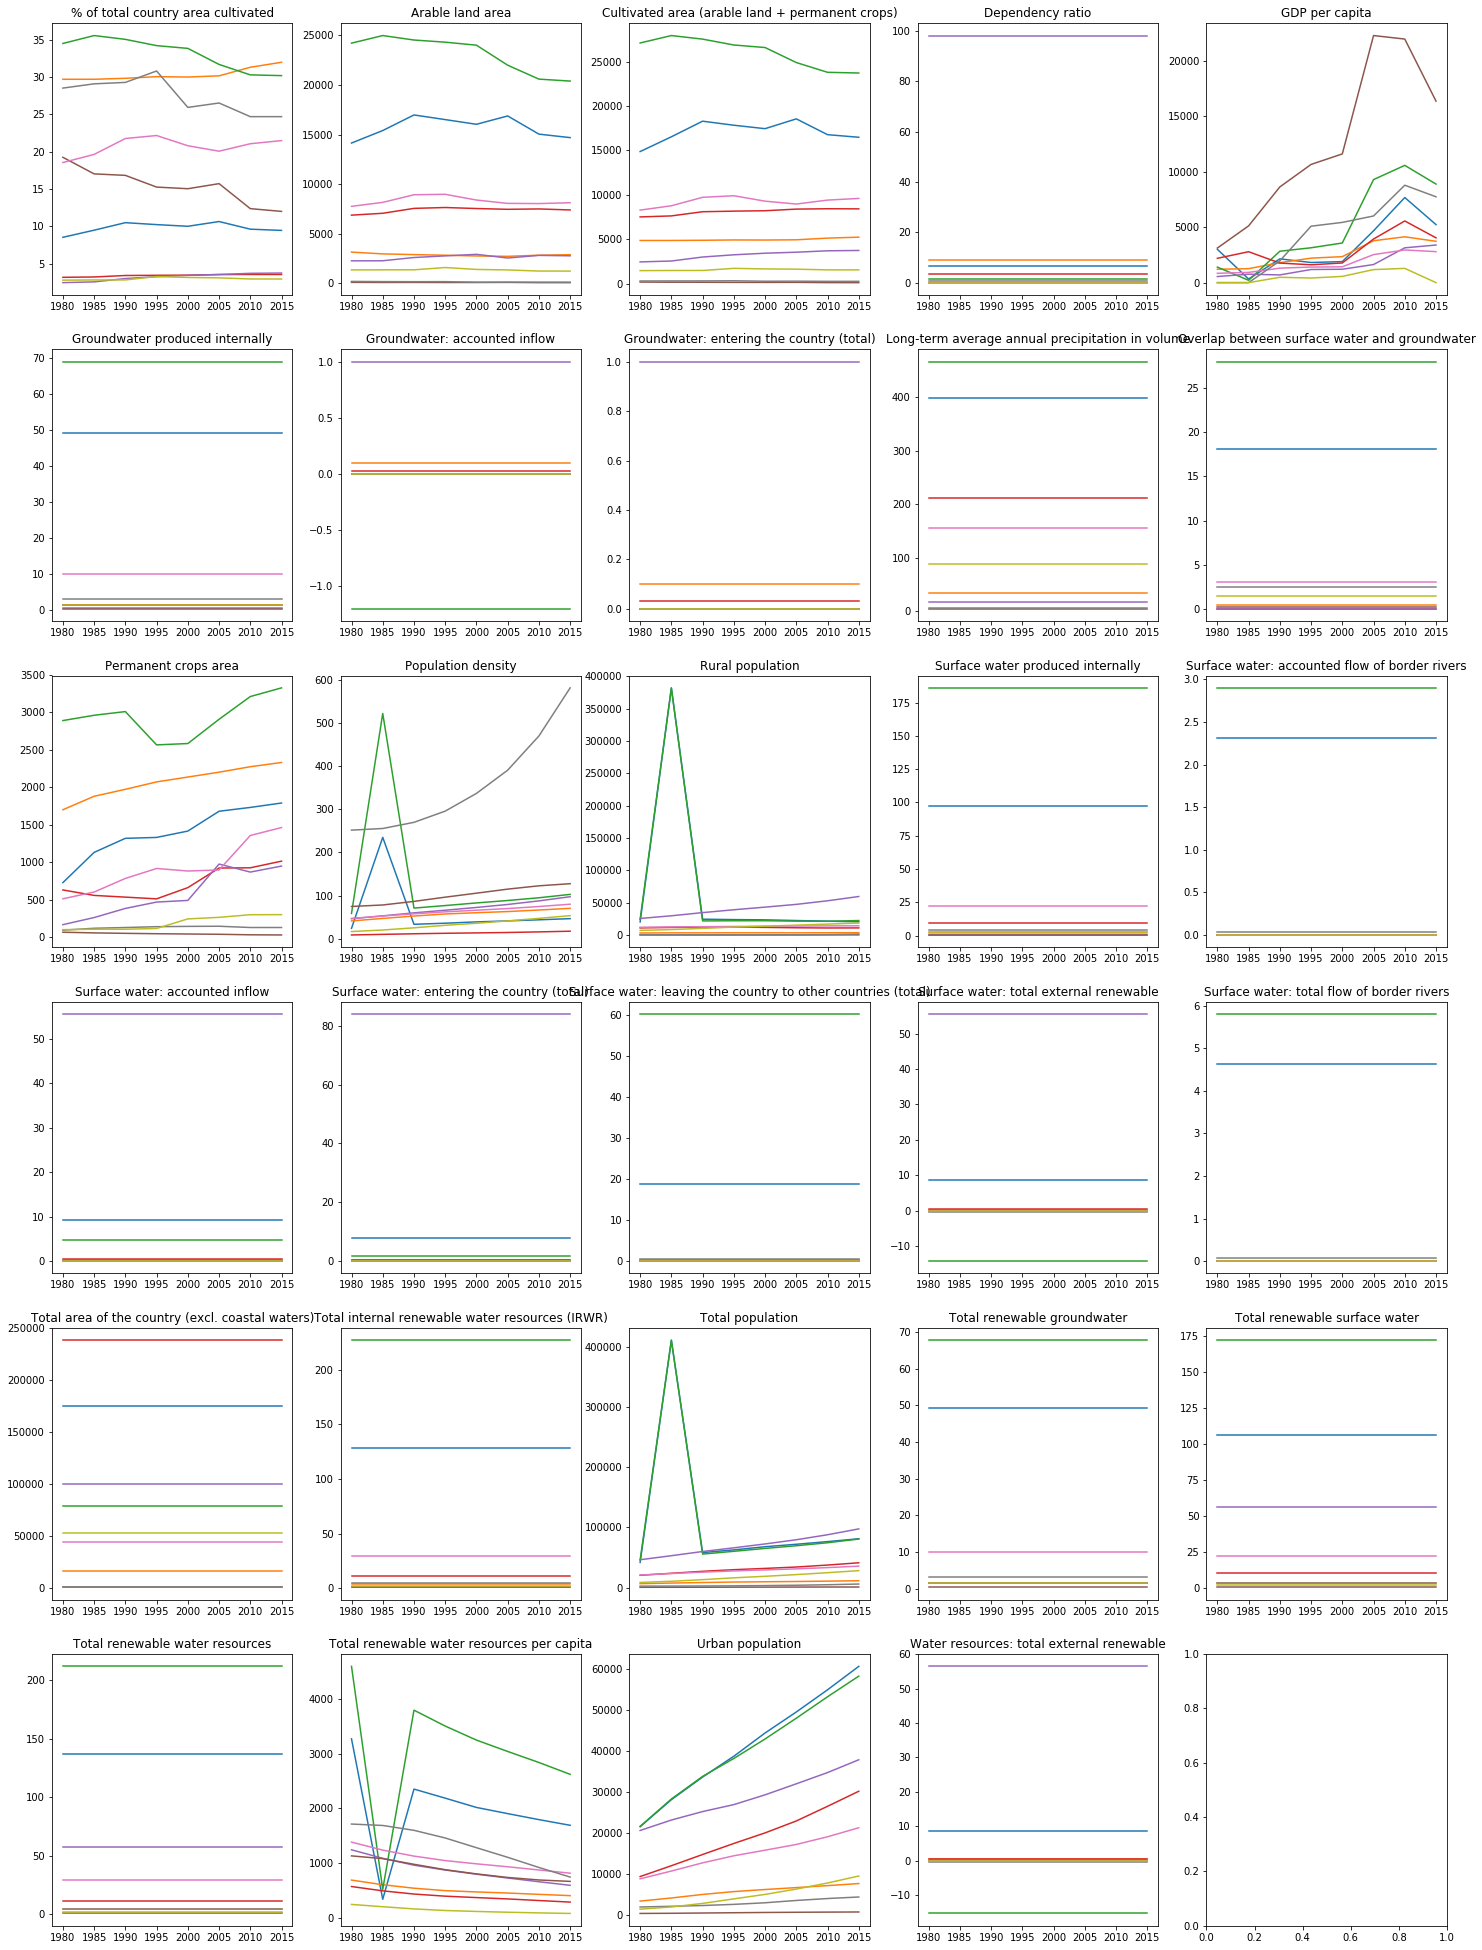

In [22]:
midEast = ['Iran (Islamic Republic of)', 'Tunisia', 'Turkey','Algeria','Egypt', 'Cyprus','Morocco','Lebanon','Yemen']
plot_vals(midEast)

## Forecasting and Prediction Modelling
The group had originally hoped to forecast water stress based on prior water stress indicators. However, after data cleaning, the water stress variable was filtered out due to sparsity. Instead, we chose: 

The value of a specific variable in a country in a given year is predicted using a variety of indicators. The model’s inputs are the statistic 5 and 10 years before as well as every other variable for the country 5 years prior to the prediction, and the statistic for every other country in its region 5 years prior. 
We train the model on the intervals from 1990-2010. With this set, we also perform LOOCV and select the model with the lowest cross-validated error. We then test out this model on the 2015 interval to obtain our error. 
Our process for making a projection is very similar. It just required some special casing in the code. We train on the 2010 & 2015 intervals to produce a single projection. 

The three models we chose are Regression Trees, Linear Regression, and Ridge. We chose regression trees because a tree will split based on country, for example, if it is a meaningful split. It is very useful to compare against models made separating based on country and a model that considers all countries data together, if we can get to the point where we use all the countries together. We also chose Linear Regression because we only have 6 rows and hope that some linear combination of them will be good enough. Finally, we chose Ridge because it performs well in the face of collinearity and we wanted to shrink potentially useless variables.


In [15]:
filter_fn1 = lambda y: y["Year"] == x - 10
filter_fn2 = lambda y: y["Year"] == x - 5
filter_fn3 = lambda y: y["Year"] == x
midEast = ['Iran (Islamic Republic of)', 'Tunisia', 'Turkey','Algeria','Egypt', 'Cyprus','Morocco','Lebanon','Yemen']

def get(df, v):
    """
    Gets the first value at v in df.
    """
    return df.loc[:,v].values[0]

features = [i for i in variables if i not in ["Year", "Area"]]

def build_tables(df, countries, features):
    """
    Constructs a look up table of data frames indexed by the country and feature. 
    Each row contains
        The feature of interest in the predicted year, 5 years before and 10 years before
        The feature of interest for all other countries in the region 5 years before
        All features for the country 5 years before.
    """
    country_dfs = {}
    for country in countries:
        per_var = {}
        for var in features:
            all_rows = []
            for x in range(1990, 2021, 5):
                country_filter = df[df["Area"] == country]
                year_filter = df[df["Year"] == x]
                
                # Special casing for 2020
                if x != 2020:
                    predicted_value = get(year_filter[year_filter["Area"] == country], var)
                else:
                    predicted_value = 'nan'
                    
                new_row = {
                    "Predicted Year": x, 
                    "Country": country, 
                    "Variable": var,
                    "Year - 10": get(country_filter[country_filter["Year"] == x - 10], var), 
                    "Year - 5": get(country_filter[country_filter["Year"] == x - 5], var), 
                    "Predicted Value": predicted_value
                }
                # Adding in the other variables for the specific country in year x-5
                country_year_filter = country_filter[country_filter["Year"] == x-5]
                country_vars = {"{}_{}".format(v, country) : get(country_year_filter, v) for v in features if v != var}
                new_row.update(country_vars)
                
                # Adding the specific variable for other countries in x-5
                year_filter_5 = df[df["Year"] == x-5]
                var_for_other_countries_5 = {"{}_{}_5".format(c, var): get(year_filter_5[year_filter_5["Area"] == c], var) for c in countries}
                new_row.update(var_for_other_countries_5)
                
                # Adding the specific variable for other countries in x-10
                year_filter_10 = df[df["Year"] == x-10]
                var_for_other_countries_10 = {"{}_{}_10".format(c, var): get(year_filter_10[year_filter_10["Area"] == c], var) for c in countries}#
                new_row.update(var_for_other_countries_10)
                
                all_rows.append(new_row)
            per_var[var] = pd.DataFrame(all_rows)
        country_dfs[country] = per_var
    return country_dfs
    
country_dfs = build_tables(final_data, midEast, features)
country_dfs[midEast[0]][features[0]]["Predicted Value"]

0    10.48
1    10.22
2    9.996
3    10.63
4    9.609
5    9.442
6      nan
Name: Predicted Value, dtype: object

In [16]:
country_dfs[midEast[0]]["GDP per capita"]["Predicted Value"]

0    2146
1    1818
2    1898
3    4679
4    7678
5    5236
6     nan
Name: Predicted Value, dtype: object

In [17]:
def train_test_split(df, year=2015):
    """
    Splits the data into
        training set of all years except `year`
        & test set of the data in `year`
    """
    df_train = df[(df["Predicted Year"] != year) & (df["Predicted Year"] != 2020)]
    X_train = df_train.drop(columns=["Predicted Value", "Predicted Year"])
    y_train = df_train["Predicted Value"]
    df_test = df[df["Predicted Year"] == year]
    X_test = df_test.drop(columns=["Predicted Value", "Predicted Year"])
    y_test = df_test["Predicted Value"]
    return X_train, X_test, y_train, y_test

In [18]:
def loocv(df, model):
    """
    Returns the cross-validated error for a model using LOOCV
    """
    errors = []
    for year in range(1990, 2015, 5):
        m = model()
        X_train, X_test, y_train, y_test = train_test_split(df, year)
        m.fit(X_train, y_train)
        pred = m.predict(X_test)
        errors.append((pred[0] - y_test.values[0])**2)
    return np.mean(errors)

In [19]:
def train(country_dfs, country, var_name, model=DecisionTreeRegressor):
    """
    Trains and cross validates a model to populate a 
    dictionary that is used to find the model with lowest CV error
    """
    df = country_dfs[country][var_name]
    df = df.drop(columns=["Country", "Variable"])
    m = model()
    X_train, X_test, y_train, y_test = train_test_split(df)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    return m, loocv(df, model)

important_features = features
models = [DecisionTreeRegressor, LinearRegression, Ridge]
def train_and_cross_validate(important_features, models, region):
    """
    Constructs a lookup table of the models and their CV errors per country feature pair in the region
    """
    trained_models = {i:{c:{} for c in region} for i in important_features}
    for c in region:
        for i in important_features:
            for m in models:
                model, error = train(country_dfs, c, i, m)
                trained_models[i][c][m] = error
    return trained_models
midEastModels = train_and_cross_validate(important_features, models, midEast)

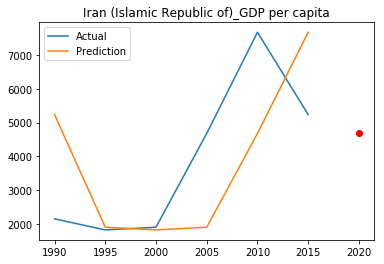

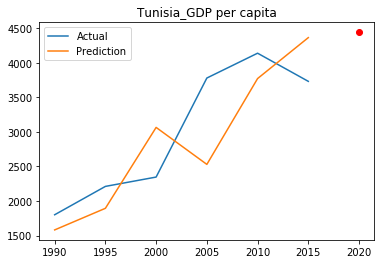

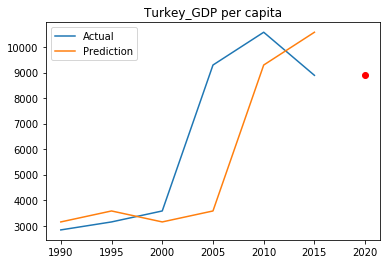

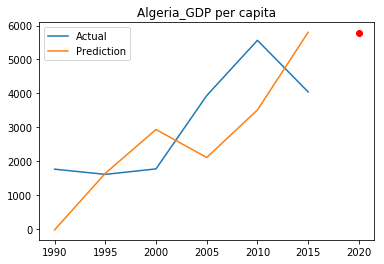

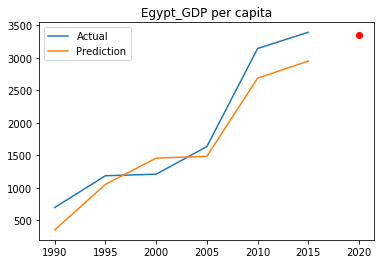

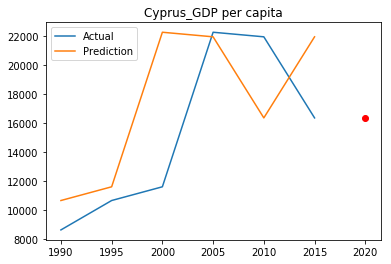

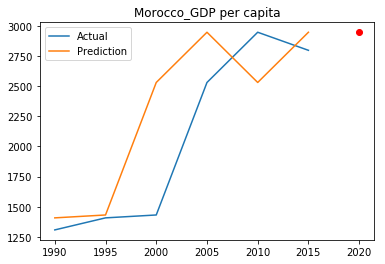

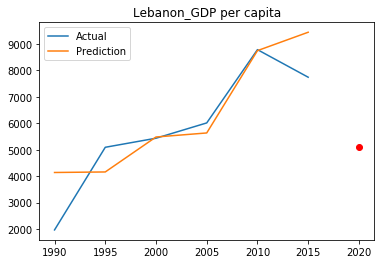

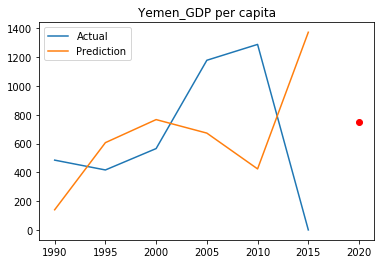

<Figure size 432x288 with 0 Axes>

In [23]:
def predict(model, country_dfs, country, var_name, year, project=False):
    """
    Predicts a single value `year` for the `var_name`, `country` pair
    """
    df = country_dfs[country][var_name]
    df = df.drop(columns=["Country", "Variable"])
    m = model()
    if project:
        train = df[df["Predicted Year"] != year]
        m.fit(train.drop(columns=["Predicted Value", "Predicted Year"]), train["Predicted Value"])
        X = df[df["Predicted Year"] == year].drop(columns=["Predicted Value", "Predicted Year"])
        return m.predict(X)
    X_train, X_test, y_train, y_test = train_test_split(df, year)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    return pred, y_test.values[0]
    
    
def plot_region(region, feature, models=models, save=False):
    """
    Plots the feature for all countries in the `region`. 
    Optionally saves to a pdf
    """
    all_models = train_and_cross_validate(important_features, models, region)
    for c in region:
        m = min(all_models[feature][c].items(), key=lambda x: x[1])[0]
        xs = list(range(1990, 2020, 5))
        ys, preds = [], []
        for year in xs:
            pred, y = predict(m, country_dfs, c, feature, year)
            preds.append(pred)
            ys.append(y)
        projection = predict(m, country_dfs, c, feature, 2020, project=True)
        plt.plot(xs, ys, label="Actual")
        plt.plot(xs, preds, label="Prediction")
        plt.plot(2020, projection, 'ro')
        plt.legend()
        plt.title("{}_{}".format(c, feature))
        if save:
            plt.savefig("{}_{}.pdf".format(c, feature))
        else:
            plt.show()
        plt.clf()

plot_region(midEast, "GDP per capita")
# [predict(LinearRegression, country_dfs, midEast[0], "GDP per capita", x) for x in  list(range(1990, 2015, 5))]

## Interpretation and Conclusions
We claim that our predictions are valid because of the data selection process. We deliberately limited the data put into the model to countries with similar geopolitical background. We hope our model is used to make more informed decisions when allocating resources in the Middle East. We also hope to use this model to incentivize better data collection for AQUASTAT. 

The current model is essentially predicted the variable off of 6 rows with about 50 variables depending on the size of the region. This is inherently small in the scope of what we hope to accomplish and makes the case for a more filled in AQUASTAT.

Concretely, given more filled in data, we could fit a model to a larger number of intervals and use a larger number of variables to enable more confidence in the predictions being made for 2020.
Our current process has high variance and bias. The variance is due to the fact that we build a separate model per country, feature pair. We are, in a way, splitting by country and feature similar to how a tree would, without actually using a tree. Future work would have us construct a much larger dataset and have a decision tree make this decision for itself. 

Because we used data that may have contained outliers as well as some interpolated data points, our models were prone to error. It is difficult to ascertain how the FAO came across all of this data, as is the nature for many international datasets. A much more stringent analysis of the data provenance would be in order before seriously utilizing the output of these models. Furthermore, some models we used such as Regression trees are prone to overfit.
Population growth is a factor which is very positively correlated with water stress. Those with increasing levels of water stress must consider putting forth education and policies which will help curb population growth.Many of the countries facing intense water stress also have relatively high rates of women marrying under the ages of 18 and 15. It is necessary that they take measures to further women’s education initiatives, improvement quality and access to workforce opportunities, and increase access to and acceptance of birth control measures. 

Policy makers must overhaul their water resource management strategies. While there are issues that can be systematically tackled, the real struggle is the climate. The Middle East and North African region is incredibly hot and arid. Thus, they have very few internal renewable water resources. These and any other countries experiencing high water demand and water stress must consider expanding their water portfolios. A recommendation that we are making universally is to invest in researching and utilizing treated graywater. This is incredibly poignant in the MENA region. Over 80% of the region’s wastewater is going unused.  Greywater is the non conventional water resource with the greatest sustainability and potential. One form of this recycling is gray water. Gray water is defined as wastewater generated from domestic activities not including bathroom use (laundering, dishwashing, bathing, etc.). Gray water is a vast resource, comprising of roughly 50-75% of all residential wastewater. The recycling of greywater may lower freshwater demands and decrease groundwater extraction by 30-50%. This will decrease the risk of aquifer salinization and recycled greywater can be used to recharge aquifers that need it. 

Based on early assessments, we were not skeptical when it came to data faithfulness. We were not informed of the data collection process in AQUASTAT, but we claimed the FAO as a reliable source. However, after further exploration, we began questioning the validity of certain data. For instance, Iran’s sudden spike in population in the 1980s, or Yemen’s GDP plummeting to zero in 2015 were interesting things to take into account. This undoubtedly came into factor when analyzing our model’s predictions. Besides being a call for accurate data input, this is also a call for data collection to make the AQUASTAT dataset less sparse.

      